<a href="https://colab.research.google.com/github/UswatunH06/Statmul/blob/main/Remedial_Statmul_Uswatun_Hasanah_Analisis_Turf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama   : Uswatun Hasanah

Nim    : 11220940000053

Kelas : 6B

Mata Kuliah : Statistika Multivariat

Remedial Metode Turf

# **Preferensi Siswa terhadap Fitur Bimbingan Belajar: Analisis TURF untuk Menentukan Kombinasi Fitur Optimal**

# Install dan Import Library

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.5 MB/s eta 0:00:00


In [ ]:
#Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pingouin as pg
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

# TURF

Misalkan sebuah perusahaan Edutech berencana meluncurkan layanan bimbingan belajar (bimbel) secara daring untuk siswa jenjang SD, SMP, dan SMA,
Dalam pengembangan layanan bimbingan belajar, perusahaan edutect tentu tidak dapat langsung menyediakan semua fitur secara bersamaan karena keterbatasan sumber daya. Oleh karena itu dilakukan penelitian untuk mengidentifikasi kombinasi fitur yang paling optimal dan sesuai dengan preferensi pengguna dari masing-masing jenjang pendidikan.

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42) # untuk hasil yang konsisten

# List fitur bimbel yang umum untuk semua jenjang
fitur_list = [
    "Quiz interaktif", "Video pembelajaran", "Sistem poin & reward", "Fitur chat dengan tutor",
    "Materi Animasi","Pengajar Berpengalaman", "Reminder belajar", "Latihan Soal",
]

kategori_siswa = ['SD', 'SMP', 'SMA']
n_per_group = 150  # jumlah responden per jenjang

# Buat DataFrame kosong untuk menampung data
data = pd.DataFrame()

for kategori in kategori_siswa:
    # Generate data 0/1 random dengan probabilitas 40% suka fitur
    arr = np.random.choice([0, 1], size=(n_per_group, len(fitur_list)), p=[0.6, 0.4])
    df_kategori = pd.DataFrame(arr, columns=fitur_list)
    df_kategori['Kategori'] = kategori
    data = pd.concat([data, df_kategori], ignore_index=True)

print(data.head())

# Simpan ke Excel
data.to_excel("fitur_bimbel.xlsx", index=False)

   Quiz interaktif  Video pembelajaran  Sistem poin & reward  \
0                0                   1                     1   
1                1                   1                     0   
2                0                   0                     0   
3                0                   1                     0   
4                0                   1                     1   

   Fitur chat dengan tutor  Materi Animasi  Pengajar Berpengalaman  \
0                        0               0                       0   
1                        1               1                       0   
2                        0               1                       0   
3                        0               0                       0   
4                        1               0                       0   

   Reminder belajar  Latihan Soal Kategori  
0                 0             1       SD  
1                 0             0       SD  
2                 0             0       SD  
3             

In [ ]:
import pandas as pd

# Baca data dari file Excel
data_path = "/content/fitur_bimbel.xlsx"
df = pd.read_excel(data_path)

fitur_list = [
    "Quiz interaktif", "Video pembelajaran", "Sistem poin & reward", "Fitur chat dengan tutor",
    "Materi Animasi", "Pengajar Berpengalaman", "Reminder belajar", "Latihan Soal",
]

kategori_siswa = ['SD', 'SMP', 'SMA']

print("Jumlah siswa yang menyukai masing-masing fitur bimbel per kategori:")

for fitur in fitur_list:
    if fitur in df.columns:
        print(f"\nFitur: {fitur}")
        for kategori in kategori_siswa:
            total_suka = df[df['Kategori'] == kategori][fitur].sum()
            print(f"  {kategori}: {total_suka}")
    else:
        print(f"Kolom {fitur} tidak ditemukan.")

Jumlah siswa yang menyukai masing-masing fitur bimbel per kategori:

Fitur: Quiz interaktif
  SD: 56
  SMP: 68
  SMA: 67

Fitur: Video pembelajaran
  SD: 57
  SMP: 64
  SMA: 51

Fitur: Sistem poin & reward
  SD: 51
  SMP: 62
  SMA: 53

Fitur: Fitur chat dengan tutor
  SD: 72
  SMP: 58
  SMA: 70

Fitur: Materi Animasi
  SD: 66
  SMP: 64
  SMA: 55

Fitur: Pengajar Berpengalaman
  SD: 60
  SMP: 55
  SMA: 68

Fitur: Reminder belajar
  SD: 69
  SMP: 61
  SMA: 65

Fitur: Latihan Soal
  SD: 55
  SMP: 62
  SMA: 58


# Visualisasi Data

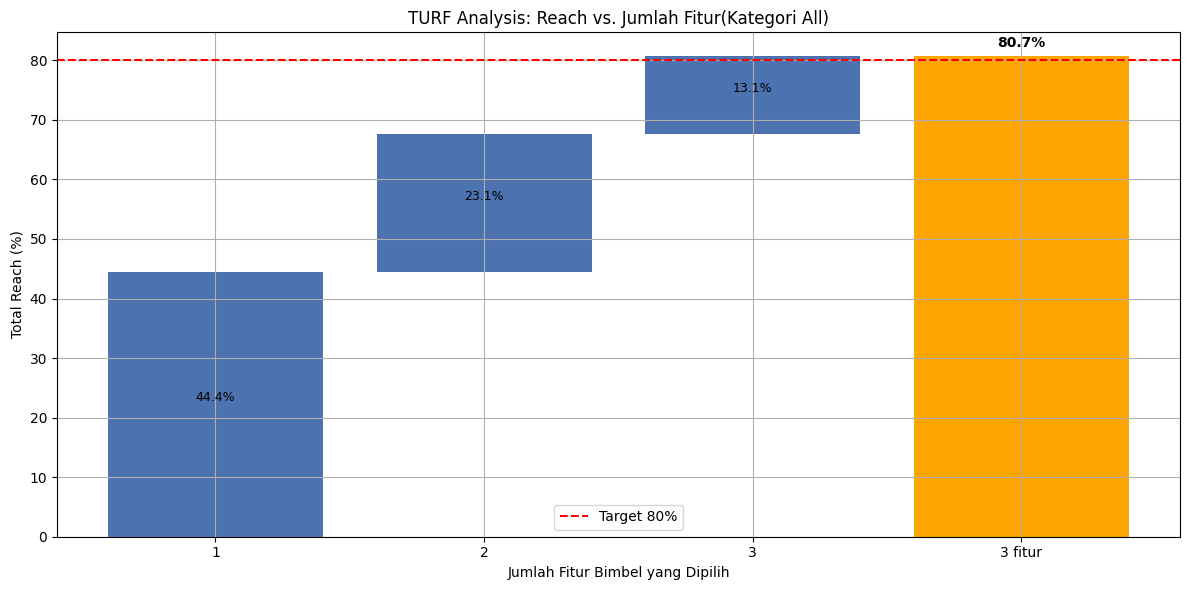

✅ Untuk mencapai minimal 80%, perlu 3 fitur.

📌 Fitur yang dipilih agar optimal:
1. Fitur chat dengan tutor
2. Reminder belajar
3. Quiz interaktif


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === PARAMETER ===
file_path = "fitur_bimbel.xlsx" #@param
Kategori = 'All' # @param ["All", "SD", "SMP", "SMA"]
Target_dalam_persen =  80# @param


# Baca data dari Excel
data = pd.read_excel(file_path)

# Filter data berdasarkan kategori jika bukan 'All'
if Kategori != 'All':
    data_used = data[data['Kategori'] == Kategori].reset_index(drop=True)
else:
    data_used = data.copy()

# Drop kolom 'Kategori' supaya tinggal fitur-fitur saja
if 'Kategori' in data_used.columns:
    data_used = data_used.drop(columns=['Kategori'])

# === SETUP ===
target_reach_pct = Target_dalam_persen / 100
target_reach = int(target_reach_pct * len(data_used))

# Daftar fitur (semua kolom sekarang)
item_cols = data_used.columns.tolist()

# Hitung reach per fitur (jumlah responden yang memilih fitur)
reach_per_item = data_used[item_cols].sum(axis=0).sort_values(ascending=False)

# === GREEDY ALGORITHM untuk pilih fitur agar reach optimal ===
selected_items = []
current_reach = set()
reach_progress = []

for item in reach_per_item.index:
    new_reach = current_reach | set(data_used.index[data_used[item] == 1])
    selected_items.append(item)
    reach_progress.append(len(new_reach) / len(data_used))

    if len(new_reach) >= target_reach:
        break

    current_reach = new_reach

# Hitung incremental reach tiap tambahan fitur
incrementals = [reach_progress[0]] + [reach_progress[i] - reach_progress[i - 1] for i in range(1, len(reach_progress))]

# === VISUALISASI ===
plt.figure(figsize=(12, 6))
bottoms = 0
for i, inc in enumerate(incrementals):
    plt.bar(f"{i + 1}", inc * 100, bottom=bottoms, color="#4c72b0")
    plt.text(i, bottoms + inc * 50, f"{inc * 100:.1f}%", ha='center', va='bottom', fontsize=9)
    bottoms += inc * 100

plt.axhline(y=target_reach_pct * 100, color='r', linestyle='--', label=f'Target {target_reach_pct * 100:.0f}%')

plt.bar(f"{len(selected_items)} fitur", reach_progress[-1] * 100, color="orange")
plt.text(len(selected_items), reach_progress[-1] * 100 + 1, f"{reach_progress[-1] * 100:.1f}%",
         ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Jumlah Fitur Bimbel yang Dipilih")
plt.ylabel("Total Reach (%)")
plt.title(f"TURF Analysis: Reach vs. Jumlah Fitur(Kategori {Kategori})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === OUTPUT ===
max_reach = max(reach_progress)
if max_reach >= target_reach_pct:
    print(f"✅ Untuk mencapai minimal {target_reach_pct*100:.0f}%, perlu {len(selected_items)} fitur.")
else:
    print(f"⚠️ Tidak dapat mencapai {target_reach_pct*100:.0f}%. Maksimal hanya {max_reach*100:.1f}% dengan {len(selected_items)} fitur.")

print("\n📌 Fitur yang dipilih agar optimal:")
for i, fitur in enumerate(selected_items, 1):
    print(f"{i}. {fitur}")

Kesimpulan berdasarkan Analis Turf :

1. Kategori SD :
Target jangkauan sebesar 80% berhasil dicapai dengan kombinasi tiga fitur bimbingan belajar, yaitu fitur chat dengan tutor,reminder belajar dan materi animasi,sehingga kombinasi tersebut sudah optimal.

2. Kategori SMP:
Target jangkauan sebesar 80% juga berhasil dicapai dengan baik. Kombinasi tiga fitur bimbingan belajar yang optimal terdiri dari materi animasi, quiz interaktif dan video pembelajaran.

3. Kategori SMA:
Target jangkauan sebesar 80% berhasil dicapai secara optimal dengan kombinasi tiga fitur bimbingan belajar, yaitu fitur chat dengan tutor, pengajar berpengalaman dan quiz interaktif.

4. Kategori All (SD, SMP, SMA):
Untuk menjangkau semua kategori sekaligus,dibutuhkan kombinasi tiga fitur bimbingan belajar yang optimal, yaitu fitur chat dengan tutor, quiz interaktif dan reminder belajar.

Kesimpulan Umum:
Secara keseluruhan, analisis TURF menunjukkan bahwa dengan kombinasi tiga fitur bimbingan belajar berdasarkan kategori siswa SD, SMP, dan SMA sudah cukup untuk mencapai bahkan melampaui target jangkauan 80%, tanpa perlu menambah fitur tambahan yang dapat menambah kompleksitas layanan.